##(5)Consider the following infinite non-periodic DT signal
$ \
x[n] =  
\begin{cases}
  0,& \text{if } n<0 \\
  1,& \text{if } 0\leq n<a\\
  0,& \text{if } n\geq a\\
\end{cases}
\
$
###a) Compute its DTFT $X(e^{j\omega})$.


####Our sequence 
$ \
x[n] =  
\begin{cases}
  1,& \text{if } 0\leq n\leq a-1\\
  0,& \text{otherwise } 
\end{cases}
\
$
DTFT of a sequence x[n] is given by the following equation:<br>
$X(e^{j\omega}) =\sum_{n=-\infty}^{n=\infty}x[n]e^{-j\omega n}  $
<br> x[n] is a rectangular pulse of length a in the range $0\leq n\leq a-1$.So if we manually compute DTFT of this rectangular pulse in the range 0 to a-1, we get, <br>
$X(e^{j\omega}) =\sum_{n=-\infty}^{n=\infty}x[n]e^{-j\omega n}$ 

$X(e^{j\omega})= \sum_{n=0}^{n=a-1}1 e^{-j\omega n}$ 

$Sum\ of\ GP$ <br>
$X(e^{j\omega})  =\frac{1-{e^{-j\omega a}}}{1-e^{-j\omega}}  $

$X(e^{j\omega})   = \frac{e^{-\frac{j\omega (a)}{2}}}{e^{-\frac{j\omega}{2}}}(\frac{{e^{j\omega \frac{a}{2}}}- {e^{-j\omega \frac{a}{2}}}}{{e^{\frac{j\omega}{2}}}- {e^{\frac{-j\omega}{2}}}})     $

$X(e^{j\omega}) = e^{-\frac{j\omega (a-1)}{2}}$( $\frac{sin(\frac{a\omega}{2})} {sin(\frac{\omega}{2})}$)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#function defining the input sequence x[n]
def input_x(a,n):
  x=[]
  for i in n:
    if i>=0 and i<a:
      x.append(1)
    else:
      x.append(0)
  return x

#function defining the DTFT
def dtft_X(w,a):
  X = np.exp(1j*(-(a-1)/2)*w)*np.sin(w*(a/2))/(np.sin(w*0.5))
  return X

In [ ]:
# function defined for plotting the input sequence and its spectrum for diferent values of a
def plotting(n,x,w,X,a):
  figure = plt.figure(figsize=(20,10))
  # Plotting Input sequence
  plt.subplot(2,2,1)
  plt.stem(n,x,use_line_collection=True)
  plt.xlabel('Sample number(n)',fontsize="14")
  plt.ylabel('x[n]',fontsize="14")
  plt.title("Input Sequence x[n] for a={}".format(a),fontsize="16")

  # Plotting Magnitude Spectrum of Input sequence
  plt.subplot(2,2,2)
  plt.plot(w,np.abs(X))
  plt.xticks([-np.pi, -3*np.pi/4, -np.pi/2, -np.pi/4, 0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi],
            [r'$-\pi$', r'$-3\pi/4$', r'$-\pi/2$', r'$-\pi/4$', r'$0$', r'$\pi/4$',r'$\pi/2$',r'$3\pi/4$', r'$\pi$'])
  plt.xlabel('Radian Frequency(w)',fontsize="14")
  plt.ylabel('Magnitude |$X(e^{jw})$|',fontsize="14")
  plt.title("Frequency Response Magnitude for a={} in $-\pi$ to $\pi$".format(a),fontsize="16")
  plt.grid(True)
  plt.show()


  figure.tight_layout(rect=[0, 0.03, 1, 0.95])
  plt.show()

In [ ]:
n = np.arange(-2,26,1)
a1,a2=10,20
# defining the input sequences for a=10,20
x1  = input_x(a1,n)
x2  = input_x(a2,n)
w=np.linspace(-(np.pi),np.pi,512) # defining the frequency axis with 512 point  
# computing the dtft
X1 = dtft_X(w,a1) 
X2 = dtft_X(w,a2)



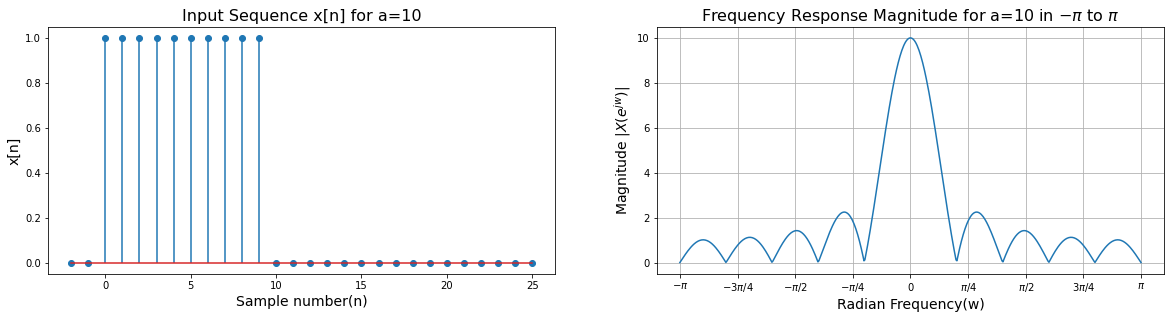

In [ ]:
plotting(n,x1,w,X1,a1)

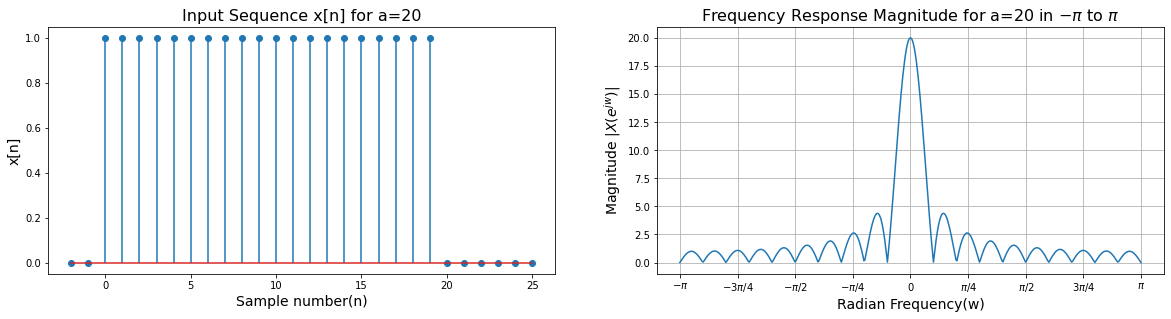

In [ ]:
plotting(n,x2,w,X2,a2)

###b) Next we want to visualize the magnitude of $X(e^{jω})$. Plot 10,000 points of one period of $|X(e^{jω})|$ (from 0 to 2π) for a = 20.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


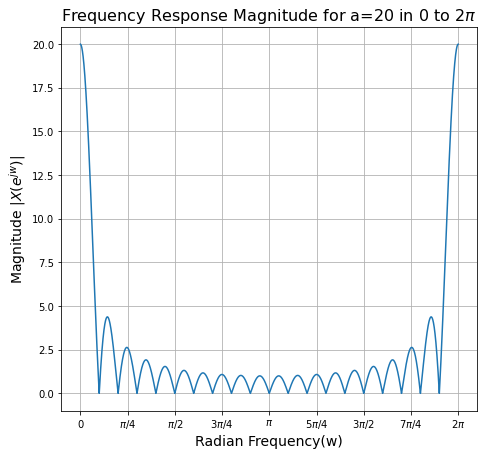

In [ ]:
NFFT=10000
a = 20
w=np.linspace(0,2*np.pi,NFFT)
X = dtft_X(w,a)
# Plotting the spectrum
figure = plt.figure(figsize=(7,7))
plt.plot(w,np.abs(X))
plt.xticks([0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi, 5*np.pi/4, 3*np.pi/2, 7*np.pi/4, 2*np.pi],
           [r'$0$', r'$\pi/4$',r'$\pi/2$',r'$3\pi/4$', r'$\pi$',r'$5\pi/4$',r'$3\pi/2$',r'$7\pi/4$', r'$2\pi$' ])
plt.xlabel('Radian Frequency(w)',fontsize="14")
plt.ylabel('Magnitude |$X(e^{jw})$|',fontsize="14")
plt.title("Frequency Response Magnitude for a={} in 0 to 2$\pi$".format(a),fontsize="16")
plt.grid(True)

figure.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

###(c) Next we will compute DFT. Generate a finite sequence $x_{n}$ of length N=30 such that $x_{1}[n]$ = x[n] for n = 1,.., N. Note a = 20. Compute its DFT and plot its magnitude (as stem plot).Compare it with the plot obtained in (b), by overlaying the two plots.

In [ ]:
def padded_seq(a,N):
  
  n=np.arange(0,a,1)
  n1=np.arange(0,N,1)
  x = np.array(input_x(a,n))
  x1 = np.pad(x,(0, N-a), 'constant')
  figure = plt.figure(figsize=(10,7))
  plt.stem(n1,x1,use_line_collection=True)
  plt.title("Padded sequence of length N={}".format(N),fontsize="16")
  plt.xlabel('Sample number(n)',fontsize="14")
  plt.ylabel('x[n]',fontsize="14")
  plt.show()
  return np.array(x1)

def dft_X(N,x1,X):
  X1 = np.fft.fft(x1)
  w = np.linspace(0,2*np.pi,N)
  w1 = np.linspace(0,2*np.pi,10000)
  figure = plt.figure(figsize=(10,7))
  plt.stem(w,np.abs(X1),use_line_collection=True)
  plt.plot(w1,np.abs(X),color="red")
  plt.xticks([0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi, 5*np.pi/4, 3*np.pi/2, 7*np.pi/4, 2*np.pi],
            [r'$0$', r'$\pi/4$',r'$\pi/2$',r'$3\pi/4$', r'$\pi$',r'$5\pi/4$',r'$3\pi/2$',r'$7\pi/4$', r'$2\pi$' ])
  plt.xlabel('Radian Frequency(w)',fontsize="14")
  plt.ylabel('Magnitude |$X(e^{jw})$|',fontsize="14")
  plt.title("Frequency Response Magnitude 0 to 2$\pi$",fontsize="16")


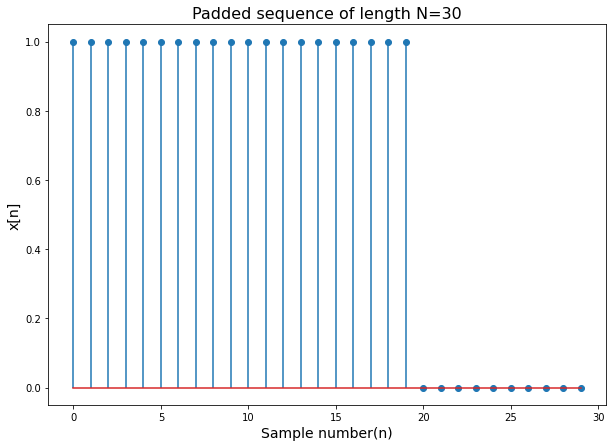

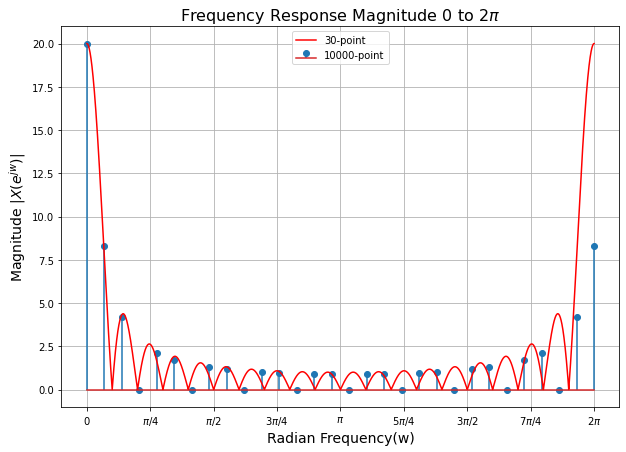

In [ ]:
a=20
N=30
x1 = padded_seq(a,N)
X1 = dft_X(N,x1,X)
plt.legend(["30-point","10000-point"])
plt.grid(True)
plt.show()

###(d) Repeat (c) for different values of N = 50, 100, 1000. What can you conclude ?

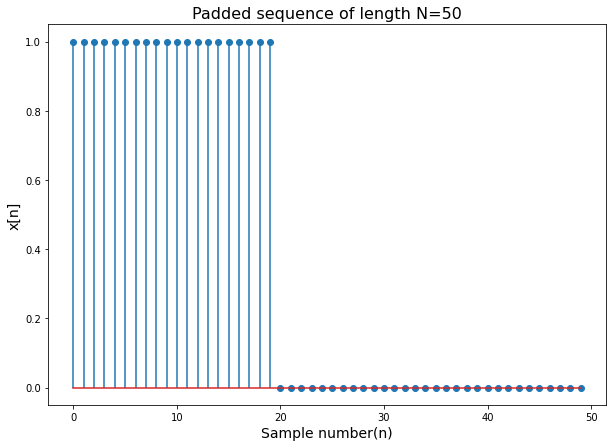

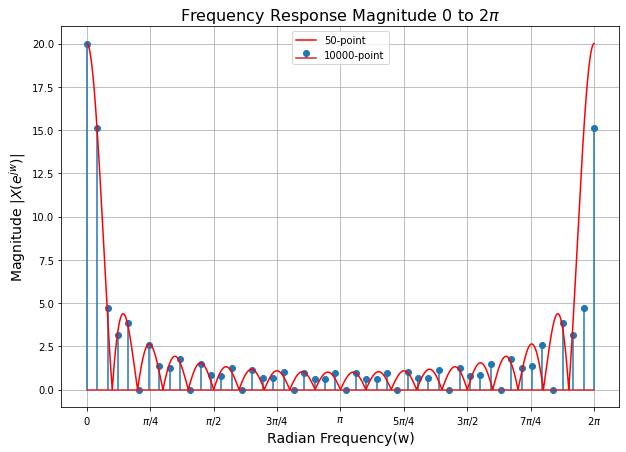

In [ ]:
a=20
N=50
x1 = padded_seq(a,N)
X1 = dft_X(N,x1,X)
plt.legend(["50-point","10000-point"])
plt.grid(True)
plt.show()

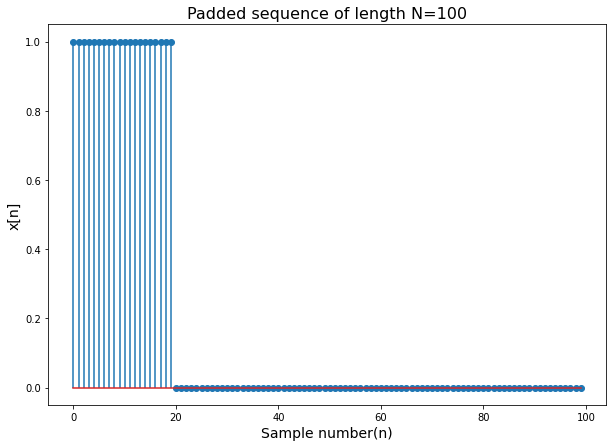

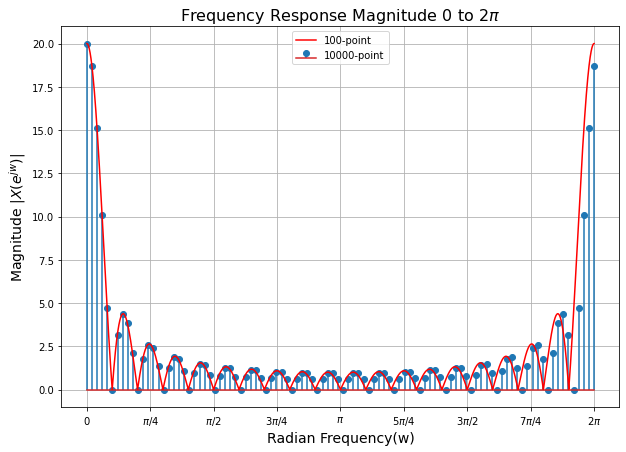

In [ ]:
a=20
N=100
x1 = padded_seq(a,N)
X1 = dft_X(N,x1,X)
plt.legend(["100-point","10000-point"])
plt.grid(True)
plt.show()

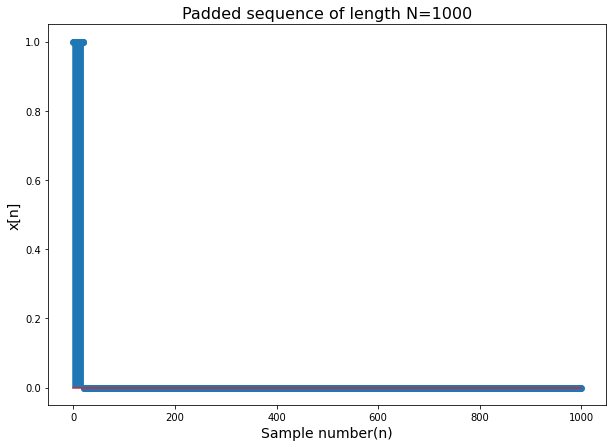

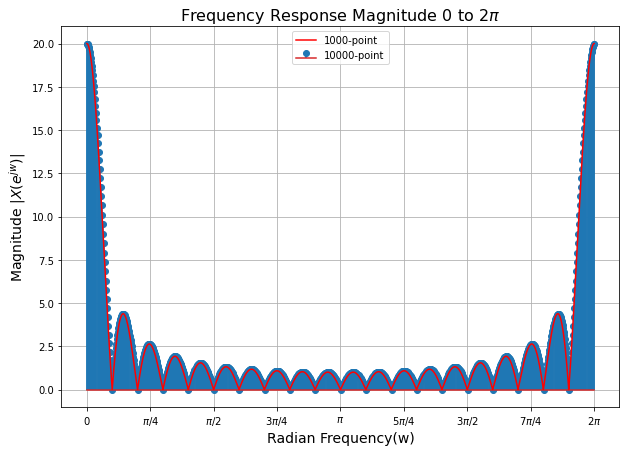

In [ ]:
a=20
N=1000
x1 = padded_seq(a,N)
X1 = dft_X(N,x1,X)
plt.legend(["1000-point","10000-point"])
plt.grid(True)
plt.show()

####5d) Observation:<br>
DTFT of a sequence x[n] is given by the following equation:<br>
$X(e^{j\omega}) =\sum_{n=-\infty}^{n=\infty}x[n]e^{-j\omega n}  $

DFT of a sequence x[n] is given by the following equation:<br>
$X[k] =\sum_{n=0}^{n=N-1}x[n]e^{-j\frac{2\pi}{N} k n} $

i.e., if we take the DTFT of a signal and sample it in the frequency domain at $\omega=\frac{2\pi}{N}$, then we get the DFT of x[n]. Thus DFT is just a sampled version of DTFT.<br>
Both the DFT & DTFT will be same and coincide if the length of DFT sequence becomes infinite with same frequency as the DTFT sequence.To improve the accuracy of DFT, the number of samples must be very high.
<br>From 5c),5d) we can clearly observe that,by increasing the number of samples N from 30,50,100 to 1000, the DFT is getting approximated to the DTFT $X(e^{j\omega})$. 

##(6)A continuous-time signal x(t)= cos(2πx3010t) is sampled at $f_{s}$ and the N-point DFT is computed using a rectangular window. Sketch the magnitude DFT in each of the following cases. Label the X-axis in terms of the DFT sample numbers k = 0, . . . , N - 1.

###(a) $f_{s}$ = 20 kHz, N = 2000.


In [ ]:
def N_dft(fs,N):
  n=np.arange(0,N,1)
  x= np.cos(2*np.pi*3010*n/fs )
  k=np.arange(0,N,1)
  X = np.fft.fft(x)
  for i in k:
    max_value=np.max(X)
    if X[i] == max_value:
      print("The impulses occur at {0} and {1}".format(i,N-i))
      print("The area of impulse is {0}".format(abs(max_value)))
  figure = plt.figure(figsize=(10,7))
  plt.xticks(np.arange(0,N+0.01,250))
  plt.xlabel("Sample number(k)",fontsize="14")
  plt.ylabel("$|X[K]|$",fontsize="14")
  plt.title("Magnitude plot of {0}-point DFT X[K] for fs={1}Hz".format(N,fs),fontsize="16")
  plt.stem(k,np.abs(X),use_line_collection=True)
  plt.grid(True)
  plt.show()

The impulses occur at 301 and 1699
The area of impulse is 1000.0000000000005


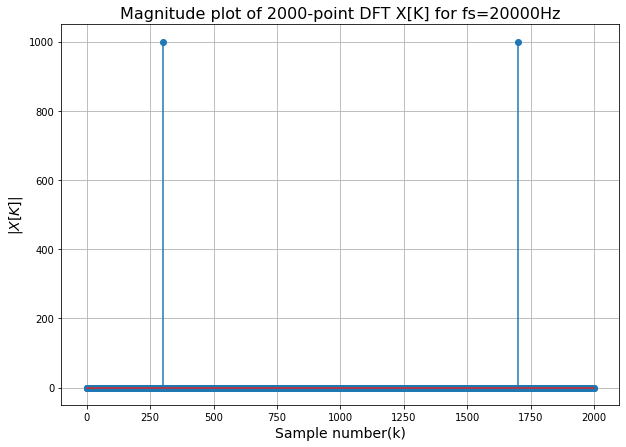

In [ ]:
fs, N=20000, 2000
N_dft(fs,N)

###(b) $f_{s}$ = 40 kHz, N = 4000.

The impulses occur at 3699 and 301
The area of impulse is 2000.0000000000005


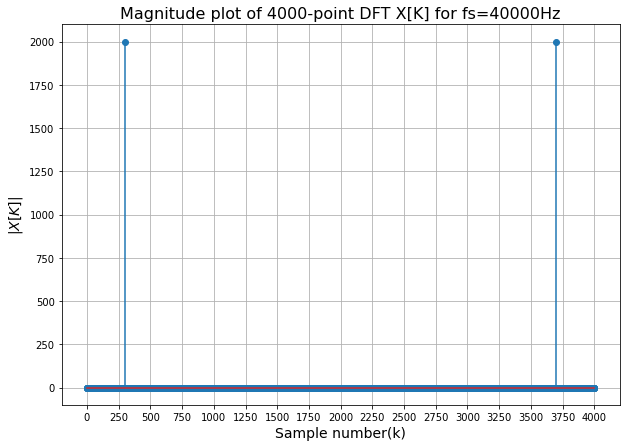

In [ ]:
fs, N=40000, 4000
N_dft(fs,N)

###(c) $f_{s}$ = 20 kHz, N = 1000.

The impulses occur at 150 and 850
The area of impulse is 317.9491243175724


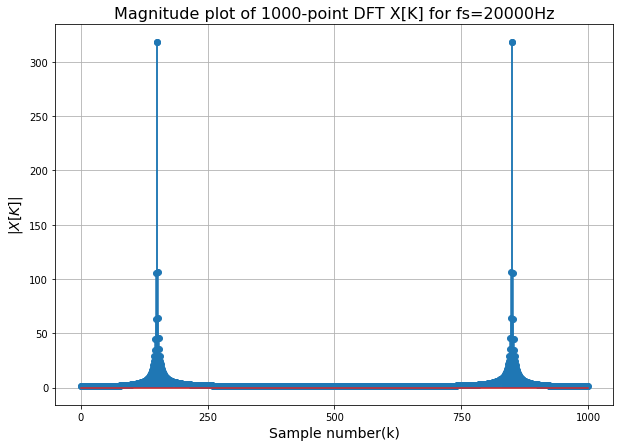

In [ ]:
fs, N=20000, 1000
N_dft(fs,N)

###(d) $f_{s}$ = 20 kHz, N = 2000 with *zero-padding*

$ \
 x[n] =  
\begin{cases}
  x(nT),& \text{for } n = 0,1,...999 \\
  0, & \text{for } n = 1000,...,1999
\end{cases}
\
$


The impulses occur at 1699 and 301
The area of impulse is 500.00000000000057


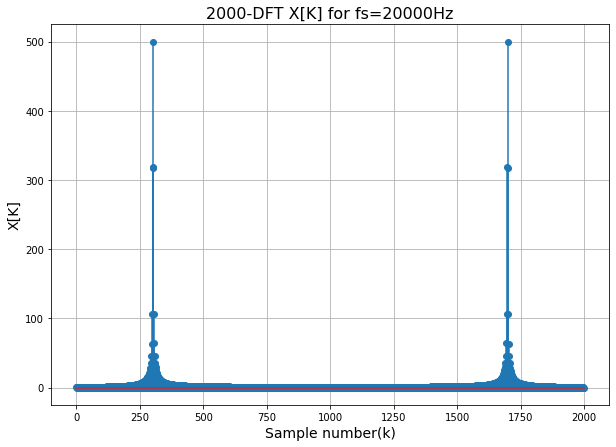

In [ ]:
fs, N = 20000, 2000
n = np.arange(0,1000,1)
new_n = np.arange(0,2000,1)
x= np.cos(2*np.pi*3010*n/fs )
padded_x = np.pad(x,(0, 1000),'constant')
k=np.arange(0,N,1)
X = np.fft.fft(padded_x)
for i in k:
  max_value=np.max(X)
  if X[i] == max_value:
    print("The impulses occur at {0} and {1}".format(i,N-i))
    print("The area of impulse is {0}".format(abs(max_value)))
figure = plt.figure(figsize=(10,7))
plt.xticks(np.arange(0,N+0.01,250))
plt.xlabel("Sample number(k)",fontsize="14")
plt.ylabel("X[K]",fontsize="14")
plt.title("{0}-DFT X[K] for fs={1}Hz".format(N,fs),fontsize="16")
plt.stem(k,np.abs(X),use_line_collection=True)
plt.grid(True)
plt.show()